1. Load dataset
2. Trim audio signals to small duration, label and store
3. Make narrowband signals (x_train)
4. Find mfcc features of wideband (y_train)
5. DNN model -> predict mfcc
6. MFCC -> audio signal


In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

In [35]:
from scipy.io import wavfile
from IPython.display import Audio, display
import os
import scipy.signal as signal
from scipy.signal import decimate
import numpy as np
import tensorflow as tf
from tensorflow import keras

import shutil
import librosa
import sklearn
from scipy.signal import butter,filtfilt

from pesq import pesq
from pystoi import stoi



In [36]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

No GPU, using /device:CPU:0.


In [37]:
#data, fs = librosa.load('/home/user/desktop/BTP_Pratik_Lovish/wav/03b03Tc.wav')


In [38]:
#print(data, fs)

In [39]:
sound_file='/home/user/Desktop/BTP_Pratik_Lovish/wav/03b03Tc.wav'
#display(Audio(sound_file, autoplay=True))


In [40]:
# downsample all audio to 4khz bandwidth (8khz sampling freq)
fs_new = 8000  # New sample rate
destination_folder = '/home/user/Desktop/BTP_Pratik_Lovish/4khz_bandwidth_wav'


# for i in file_names:
#   fs, data = wavfile.read('/content/drive/MyDrive/wav/'+i)
#   data_downsampled= signal.resample(data, int(len(data) * fs_new / fs))
#   # Save the downsampled signal to a new WAV file
#   new_filename="downsampled_"+i
#   wavfile.write(new_filename, fs_new, data_downsampled)

#   # move file to drive 
#   source_file = '/content/'+new_filename
#   shutil.move(source_file, destination_folder)



In [41]:
cutoff=4100
nyq=8000
order=6
fs=16000

In [42]:
#Function for lowpass filter
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [43]:
cnt={}

Take audio path -> break it into "s" seconds audio ( if less than second rem then pad ) -> return array of data of "s" second data


In [44]:


frame_size=512#2048  #512
hop_length=frame_size//2#512 #256
mfccs=100
audio_framesx=[] # each frame has mfcc+ stft info


In [45]:
def chunk(path,fs,dur):
  arr, fs=librosa.load(path,sr=None) 
  aud_chunks=[]
  sample_per_frame=int(fs*dur)

  #print(sample_per_frame)
  cnt_chunks=len(arr)//sample_per_frame
  rem=len(arr)%sample_per_frame
  arr=np.append(arr,np.zeros(sample_per_frame-rem))

  if rem:
    cnt_chunks+=1

  for i in range(cnt_chunks):
    frame=[]
    for j in range(sample_per_frame):
      frame.append(arr[i*sample_per_frame+j])
    aud_chunks.append(frame)
  
  return aud_chunks


In [46]:
from scipy.io import wavfile
from scipy.signal import resample

In [47]:
def create_dataset(atekhz):
  #x, sr1 = librosa.load(atekhz)
  #x=x[:min_len]

#   audio_x=chunk(atekhz, fs,0.5)
#   for xarr in audio_x:
    x, f=librosa.load(atekhz)
    lowed_signal=butter_lowpass_filter(x, cutoff, fs, order)
    #xx=librosa.feature.mfcc(y=lowed_signal, sr=fs//2, n_fft=frame_size, hop_length=hop_length, n_mfcc=mfccs)


    mf=librosa.feature.mfcc(y=lowed_signal, sr=fs//2, n_fft=frame_size, hop_length=hop_length, n_mfcc=mfccs)

    # delta_mfccs = librosa.feature.delta(mf)
    # delta2_mfccs = librosa.feature.delta(mf, order=2)
    #xx = np.hstack((mf, delta_mfccs, delta2_mfccs))
    #print(mf.shape, delta_mfccs.shape, delta2_mfccs.shape, xx.shape)
    xstft = np.abs(librosa.stft(lowed_signal,n_fft=frame_size, hop_length=hop_length))
    #print(xstft.shape)
    xframewise=[]

    for j in range(len(mf[0])):
      z=[]
      for i in range(len(mf)):
        z.append(mf[i][j])
      # for i in range(len(mf)):
      #   z.append(delta_mfccs[i][j])
      # for i in range(len(mf)):
      #   z.append(delta2_mfccs[i][j])
      XXm.append(z)

    for j in range(len(xstft[0])):
      z=[]
      for i in range(len(xstft)):
        z.append(xstft[i][j])
      XXs.append(z)

    y=np.abs(librosa.stft(x,n_fft=frame_size, hop_length=hop_length))
    for j in range(len(y[0])):
      z=[]
      for i in range(len(y)):
        z.append(y[i][j])
      YY.append(z)


In [48]:
#create_dataset('/content/drive/MyDrive/wav/03a01Fa.wav')

In [49]:
XXs=[]
XXm=[]
YY=[]

folder_path = '/home/user/Desktop/BTP_Pratik_Lovish/wav'
file_names = os.listdir(folder_path)

target_folder=r'/home/user/Desktop/BTP_Pratik_Lovish/timit-20230118T185105Z-001/timit'
drfolders=os.listdir(target_folder)


for f in file_names:
    atekhz=folder_path+'/'+f
    create_dataset(atekhz)

#timit 

for folders in drfolders:
  allfiles=os.listdir(target_folder+'/'+folders)
  for files in allfiles:
    if files.endswith('.wav'):
        atekhz=target_folder+'/'+folders+'/'+files
        create_dataset(atekhz)

folders=[ 'Speech']
prepath='/home/user/Desktop/BTP_Pratik_Lovish/speech/'
for f in folders:
  ifolders=os.listdir(prepath+str(f))
  for ifolder in ifolders:
    if not ifolder.endswith('README'):
      files=os.listdir(prepath+str(f)+'/'+str(ifolder))
      for fil in files:
        if fil.endswith('.wav'):
          atekhz=prepath+str(f)+'/'+str(ifolder)+'/'+str(fil)
          if len(XXs)>800000:
            break
          create_dataset(atekhz)

In [50]:

#Splitting the dataset
Xs_train, Xs_test, Xm_train,Xm_test, y_train, y_test = sklearn.model_selection.train_test_split(XXs, XXm, YY, test_size=0.2)

In [51]:
Xs_train=np.array(Xs_train)
Xs_test=np.array(Xs_test)
Xm_train=np.array(Xm_train)
Xm_test=np.array(Xm_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [72]:
modelm = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu", input_shape=Xm_train[0].shape),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu')
])

# Define the second neural network
models = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu", input_shape=Xs_train[0].shape),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu')
])

# Concatenate the two models
concatenated = tf.keras.layers.Concatenate()([modelm.output, models.output])
dense_layer1 = tf.keras.layers.Dense(512, activation='relu')(concatenated)
dense_layer2 = tf.keras.layers.Dense(256, activation='relu')(dense_layer1)
output_layer = tf.keras.layers.Dense(units=int(y_train[0].shape[0]), activation="linear")(dense_layer2)

# Define the final model with the concatenated layers
model = tf.keras.models.Model(inputs=[modelm.input, models.input], outputs=output_layer)
model.compile(loss=tf.keras.losses.CosineSimilarity(axis=1), optimizer="adam", metrics=["accuracy"])


In [96]:
model.fit([Xm_train, Xs_train], y_train, epochs=650, batch_size=64, validation_data=([Xm_test, Xs_test], y_test))


Epoch 1/650
10322/10322 [==============================] - 150s 15ms/step - loss: -0.9996 - accuracy: 0.9902 - val_loss: -0.9979 - val_accuracy: 0.9820
Epoch 2/650
10322/10322 [==============================] - 146s 14ms/step - loss: -0.9996 - accuracy: 0.9905 - val_loss: -0.9980 - val_accuracy: 0.9822
Epoch 3/650
10322/10322 [==============================] - 147s 14ms/step - loss: -0.9996 - accuracy: 0.9903 - val_loss: -0.9979 - val_accuracy: 0.9809
Epoch 4/650
10322/10322 [==============================] - 146s 14ms/step - loss: -0.9996 - accuracy: 0.9903 - val_loss: -0.9979 - val_accuracy: 0.9814
Epoch 5/650
10322/10322 [==============================] - 145s 14ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9980 - val_accuracy: 0.9819
Epoch 6/650
10322/10322 [==============================] - 145s 14ms/step - loss: -0.9996 - accuracy: 0.9903 - val_loss: -0.9979 - val_accuracy: 0.9815
Epoch 7/650
10322/10322 [==============================] - 149s 14ms/step - loss: -0.999

10322/10322 [==============================] - 157s 15ms/step - loss: -0.9996 - accuracy: 0.9903 - val_loss: -0.9979 - val_accuracy: 0.9818
Epoch 55/650
10322/10322 [==============================] - 155s 15ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9979 - val_accuracy: 0.9815
Epoch 56/650
10322/10322 [==============================] - 158s 15ms/step - loss: -0.9996 - accuracy: 0.9905 - val_loss: -0.9979 - val_accuracy: 0.9811
Epoch 57/650
10322/10322 [==============================] - 157s 15ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9979 - val_accuracy: 0.9812
Epoch 58/650
10322/10322 [==============================] - 158s 15ms/step - loss: -0.9996 - accuracy: 0.9905 - val_loss: -0.9979 - val_accuracy: 0.9826
Epoch 59/650
10322/10322 [==============================] - 160s 15ms/step - loss: -0.9996 - accuracy: 0.9903 - val_loss: -0.9980 - val_accuracy: 0.9827
Epoch 60/650
10322/10322 [==============================] - 161s 16ms/step - loss: -0.9996 - ac

10322/10322 [==============================] - 154s 15ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9979 - val_accuracy: 0.9818
Epoch 108/650
10322/10322 [==============================] - 153s 15ms/step - loss: -0.9996 - accuracy: 0.9905 - val_loss: -0.9979 - val_accuracy: 0.9822
Epoch 109/650
10322/10322 [==============================] - 153s 15ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9979 - val_accuracy: 0.9820
Epoch 110/650
10322/10322 [==============================] - 151s 15ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9979 - val_accuracy: 0.9812
Epoch 111/650
10322/10322 [==============================] - 153s 15ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9979 - val_accuracy: 0.9815
Epoch 112/650
10322/10322 [==============================] - 153s 15ms/step - loss: -0.9996 - accuracy: 0.9903 - val_loss: -0.9979 - val_accuracy: 0.9827
Epoch 113/650
10322/10322 [==============================] - 155s 15ms/step - loss: -0.999

10322/10322 [==============================] - 150s 15ms/step - loss: -0.9996 - accuracy: 0.9906 - val_loss: -0.9979 - val_accuracy: 0.9825
Epoch 161/650
10322/10322 [==============================] - 150s 15ms/step - loss: -0.9996 - accuracy: 0.9904 - val_loss: -0.9979 - val_accuracy: 0.9816
Epoch 162/650
10322/10322 [==============================] - 151s 15ms/step - loss: -0.9996 - accuracy: 0.9906 - val_loss: -0.9979 - val_accuracy: 0.9814
Epoch 163/650
10322/10322 [==============================] - 150s 15ms/step - loss: -0.9996 - accuracy: 0.9905 - val_loss: -0.9979 - val_accuracy: 0.9816
Epoch 164/650
10322/10322 [==============================] - 151s 15ms/step - loss: -0.9996 - accuracy: 0.9907 - val_loss: -0.9979 - val_accuracy: 0.9817
Epoch 165/650
10322/10322 [==============================] - 150s 15ms/step - loss: -0.9996 - accuracy: 0.9906 - val_loss: -0.9979 - val_accuracy: 0.9816
Epoch 166/650
10322/10322 [==============================] - 151s 15ms/step - loss: -0.999

10322/10322 [==============================] - 213s 21ms/step - loss: -0.9996 - accuracy: 0.9906 - val_loss: -0.9979 - val_accuracy: 0.9817
Epoch 214/650
10322/10322 [==============================] - 213s 21ms/step - loss: -0.9996 - accuracy: 0.9907 - val_loss: -0.9979 - val_accuracy: 0.9808
Epoch 215/650
10322/10322 [==============================] - 214s 21ms/step - loss: -0.9996 - accuracy: 0.9906 - val_loss: -0.9979 - val_accuracy: 0.9820
Epoch 216/650
10322/10322 [==============================] - 216s 21ms/step - loss: -0.9996 - accuracy: 0.9907 - val_loss: -0.9979 - val_accuracy: 0.9813
Epoch 217/650
10322/10322 [==============================] - 219s 21ms/step - loss: -0.9996 - accuracy: 0.9908 - val_loss: -0.9979 - val_accuracy: 0.9818
Epoch 218/650
10322/10322 [==============================] - 218s 21ms/step - loss: -0.9996 - accuracy: 0.9908 - val_loss: -0.9979 - val_accuracy: 0.9806
Epoch 219/650
10322/10322 [==============================] - 218s 21ms/step - loss: -0.999

10322/10322 [==============================] - 213s 21ms/step - loss: -0.9996 - accuracy: 0.9908 - val_loss: -0.9980 - val_accuracy: 0.9820
Epoch 267/650
10322/10322 [==============================] - 214s 21ms/step - loss: -0.9996 - accuracy: 0.9906 - val_loss: -0.9979 - val_accuracy: 0.9815
Epoch 268/650
10322/10322 [==============================] - 212s 21ms/step - loss: -0.9996 - accuracy: 0.9907 - val_loss: -0.9979 - val_accuracy: 0.9819
Epoch 269/650
10322/10322 [==============================] - 213s 21ms/step - loss: -0.9996 - accuracy: 0.9907 - val_loss: -0.9979 - val_accuracy: 0.9821
Epoch 270/650
10322/10322 [==============================] - 213s 21ms/step - loss: -0.9996 - accuracy: 0.9907 - val_loss: -0.9979 - val_accuracy: 0.9815
Epoch 271/650
10322/10322 [==============================] - 213s 21ms/step - loss: -0.9996 - accuracy: 0.9906 - val_loss: -0.9980 - val_accuracy: 0.9824
Epoch 272/650
10322/10322 [==============================] - 213s 21ms/step - loss: -0.999

KeyboardInterrupt: 

In [56]:
#new_model = tf.keras.models.load_model('my_model')

# Check its architecture
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dense_9_input (InputLayer)      [(None, 100)]        0                                            
__________________________________________________________________________________________________
dense_12_input (InputLayer)     [(None, 257)]        0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 1024)         103424      dense_9_input[0][0]              
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 1024)         264192      dense_12_input[0][0]             
____________________________________________________________________________________________

In [97]:

# Evaluate the model
test_loss, test_acc =model.evaluate([Xm_test, Xs_test], y_test)
print('Test accuracy:', test_acc)

5161/5161 [==============================] - 29s 6ms/step - loss: -0.9979 - accuracy: 0.9819
Test accuracy: 0.9819493293762207


In [98]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [112]:
paths=[]
ind=0

fs=16000
path='/home/user/Desktop/BTP_Pratik_Lovish/timit-20230118T185105Z-001/timit'

tot=0 
pesqavg=0
stoiavg=0


target_folder='/home/user/Desktop/BTP_Pratik_Lovish/VCTK-Corpus/wav48'
totest=os.listdir(target_folder)

for folders in totest:
  allfiles=os.listdir(target_folder+'/'+folders)
  for files in allfiles:
    if files.endswith('.wav'):
        if tot>=1000:
            break
        atekhz=target_folder+'/'+folders+'/'+files
        x, f=librosa.load(atekhz)
        x=librosa.resample(x, f, 16000) # for vctk dataset
        f=16000
        Xm=[]
        Xs=[]
        lowed_signal=butter_lowpass_filter(x, cutoff, fs, order)
        mf=librosa.feature.mfcc(y=lowed_signal, sr=fs//2, n_fft=frame_size, hop_length=hop_length, n_mfcc=mfccs)

        # delta_mfccs = librosa.feature.delta(mf)
        # delta2_mfccs = librosa.feature.delta(mf, order=2)
        #xx = np.hstack((mf, delta_mfccs, delta2_mfccs))
        #print(mf.shape, delta_mfccs.shape, delta2_mfccs.shape, xx.shape)
        xstft = np.abs(librosa.stft(lowed_signal,n_fft=frame_size, hop_length=hop_length))
        #print(xstft.shape)
        xframewise=[]

        for j in range(len(mf[0])):
          z=[]
          for i in range(len(mf)):
            z.append(mf[i][j])
          # for i in range(len(mf)):
          #   z.append(delta_mfccs[i][j])
          # for i in range(len(mf)):
          #   z.append(delta2_mfccs[i][j])
          Xm.append(z)

        for j in range(len(xstft[0])):
          z=[]
          for i in range(len(xstft)):
            z.append(xstft[i][j])
          Xs.append(z)

        #XXs.append(z)
        # audio_framesx.append(xframewise)
        # for i in xframewise:
        #   XXs.append(i)

        y_pred=model.predict([np.array(Xm), np.array(Xs)])
        yFormat=[]

        for j in range(len(y_pred[0])):
            z=[]
            for i in range(len(y_pred)):
              z.append(y_pred[i][j])
            yFormat.append(z)
        toplay=[]
        final_aud = librosa.griffinlim(np.array(yFormat), hop_length=hop_length)
        for i in final_aud:
            toplay.append(i)

        toplay=np.array(toplay)
        minlen=min(len(x), len(toplay))
        score=pesq(fs,x[:minlen],  toplay[:minlen], 'wb')
        stoi_score = stoi( toplay[:minlen], x[:minlen], fs, extended=False)
        tot+=1
        pesqavg+=score
        stoiavg+=stoi_score
        print(score, stoi_score)
        
    #Audio(toplay,rate=16000)

print('averages')
print(pesqavg/tot, stoiavg/tot)


3.5792176723480225 0.9552507382952274
4.151932716369629 0.9041473474579839
4.068626403808594 0.9366355711334255
3.7598180770874023 0.8901178914442606
3.919708728790283 0.9750097457714274
3.960050344467163 0.948584105676113
3.7149009704589844 0.9182337528171773
3.9563441276550293 0.9159336352573245
3.8932154178619385 0.8991685626893383
3.86728835105896 0.973284635190594
4.007477283477783 0.9427825992234015
3.88081431388855 0.9435469641470479
4.102289199829102 0.9594019681332864
3.7701401710510254 0.9429343078618789
3.834510087966919 0.9336819855635158
4.177086353302002 0.9364095184381709
3.9010941982269287 0.928938307831639
3.2129833698272705 0.920150943582608
3.558336019515991 0.8355835467719119
3.564776659011841 0.9509831809246408
4.029563903808594 0.9357564192591676
3.9794485569000244 0.8724554062368786
3.862083911895752 0.9624843996541015
4.079300880432129 0.955666802782591
3.982614040374756 0.9180600661581807
4.221593379974365 0.9176627583741953
4.130198001861572 0.9319693976494418

4.048877716064453 0.9026332580645122
3.977673053741455 0.9276013028463833
3.89854097366333 0.943941459714312
3.64083194732666 0.9266418057449972
3.9163401126861572 0.9589973780770495
4.0998992919921875 0.9149618051420406
3.796144962310791 0.8939574406351539
3.913281202316284 0.9267942961035871
4.155980110168457 0.9456798359200081
4.205958843231201 0.8994909583104632
3.662231922149658 0.8970200729522372
4.097925186157227 0.9562093887761212
3.9823291301727295 0.922785762592938
4.076147079467773 0.8762579042524999
3.7466771602630615 0.9630707137811028
3.865732431411743 0.881467845045764
3.08378529548645 0.9457249682195783
3.862584352493286 0.9249804606556553
3.5757369995117188 0.9490118636276406
3.948655128479004 0.905435636227668
3.8732590675354004 0.9208543219945516
3.915001630783081 0.9241254543067056
3.8503425121307373 0.9321013397088039
3.9215872287750244 0.9606535929177095
4.111632347106934 0.9381826417559817
4.1247334480285645 0.9084518222116467
3.9451913833618164 0.897542695021194

3.4980106353759766 0.926431121801606
3.5294337272644043 0.9265482932452979
3.6626908779144287 0.8860372776388502
3.9592480659484863 0.8963856688378341
3.6328999996185303 0.8904570054534261
3.666865825653076 0.9223741211618695
3.79062557220459 0.9138121793924909
3.8238184452056885 0.9281652623509872
3.4452970027923584 0.950877069154091
3.5122342109680176 0.8349972898880738
3.5616259574890137 0.924176225462808
3.5580413341522217 0.8772366073448985
3.2949469089508057 0.9519943999563517
3.8193469047546387 0.9241637219026365
3.7409017086029053 0.8866463956406742
3.8120665550231934 0.86958511525301
3.586498737335205 0.9143169693749437
3.5754172801971436 0.8875507234411087
3.5506324768066406 0.8804249970595223
3.986039161682129 0.8926800352087394
3.9236133098602295 0.8834188943733551
3.833554744720459 0.9196001786058515
3.7594268321990967 0.9293592218773692
3.4485280513763428 0.8562902237665074
3.758467435836792 0.9163842367146344
3.5875775814056396 0.8698665113928112
3.808424949645996 0.8738

2.719381332397461 0.9035113889404941
3.5471720695495605 0.9243016453414565
3.413867712020874 0.9277665379275314
3.4278547763824463 0.9492799725620704
3.5989933013916016 0.8899624700501195
3.894541025161743 0.92515307486635
3.42376971244812 0.8841010429112548
3.713862180709839 0.8842303734578497
3.464634418487549 0.8974804048888954
3.248751640319824 0.949145527937616
3.7641096115112305 0.8829616913132649
3.539133071899414 0.9053082046598183
3.5295944213867188 0.9217741202405221
3.7632741928100586 0.9175163070692252
3.1189656257629395 0.9038768358615181
3.826298475265503 0.907509006086698
3.8253121376037598 0.8963462762693196
3.665754556655884 0.9546437427103392
3.548102617263794 0.8193117284167134
3.9988648891448975 0.9208895007012086
3.7558929920196533 0.94502683935484
3.5935375690460205 0.8948926697404207
3.7174103260040283 0.9187411925709966
3.9561033248901367 0.9159401903303087
3.9265666007995605 0.8178288353958788
3.9757955074310303 0.9208870590737754
3.6464157104492188 0.887435779

3.820943593978882 0.927446307338225
3.695488929748535 0.9515226575031424
3.54632830619812 0.9612074695517352
3.495654344558716 0.9104765068921947
3.786128520965576 0.969865988008309
3.863041877746582 0.9027422136590453
3.9701526165008545 0.9649759783607252
4.044124603271484 0.9627740613417111
3.82560396194458 0.9163750821700298
3.955085039138794 0.9618873955140227
3.5240113735198975 0.9593886842498156
3.4604456424713135 0.9312163859336638
3.354184865951538 0.9507509241506023
3.670557737350464 0.9630779758351875
3.6642415523529053 0.9691011052952359
4.062143325805664 0.9206689811922582
3.7656803131103516 0.9638278074462401
3.80011248588562 0.9129647837031108
3.4816396236419678 0.9050123457835949
3.5197219848632812 0.9467520675815719
3.639103651046753 0.9503343396037928
3.532745599746704 0.8992907974259431
3.7835960388183594 0.9549230620595127
3.483949899673462 0.9336040566695752
4.000739574432373 0.8594816805867141
3.3649396896362305 0.9683197812541944
3.0501902103424072 0.9313444562614

In [113]:
print(tot)

1000


In [107]:
print(pesqavg/tot, stoiavg/tot)


3.473032024906034 0.9160656271076375


In [ ]:
pip install pesq


In [ ]:
Audio(np.array(lowpassed),rate=16000)


In [ ]:
import librosa
import numpy as np
from scipy.special import kl_div

In [ ]:
# audio1, sr1 = librosa.load('/content/drive/MyDrive/timit-20230118T185105Z-001/timit/dr1-fvmh0/sa1.wav', sr=None)
# audio2, sr2 = librosa.load('/content/download.wav', sr=None)
# # Preprocess the audio signals
# #hop_length = 512  # Choose the hop length for the STFT
# #n_fft = 2048  # Choose the FFT window size for the STFT
# power1 = np.abs(librosa.stft(audio1, hop_length=hop_length, n_fft=frame_size))**2
# power2 = np.abs(librosa.stft(audio2, hop_length=hop_length, n_fft=frame_size))**2
# log_power1 = librosa.power_to_db(power1)
# log_power2 = librosa.power_to_db(power2)


# # Compute the log spectral distance
# kl_divs = kl_div(log_power1.T, log_power2.T[:len(log_power1.T)])
# log_spectral_distance = np.mean(kl_divs)
# print(log_spectral_distance)

In [84]:
import matplotlib.pyplot as plt


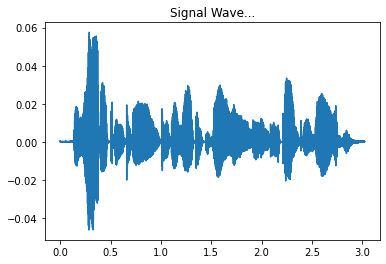

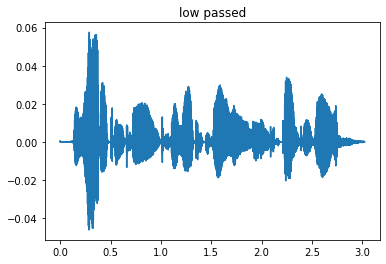

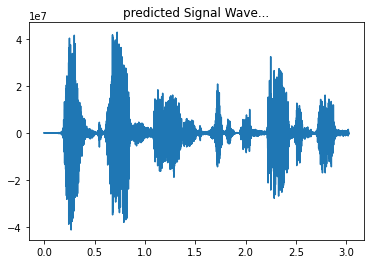

In [85]:
Time = np.linspace(0, len(data) / fs, num=len(data))
t = np.linspace(0, len(toplay) / fs, num=len(toplay))
toplay=toplay[:Time.shape[0]]
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, data)

plt.figure(2)
plt.title("low passed")
plt.plot(Time, lowpassed[:len(Time)])
plt.show()

plt.figure(3)
plt.title("predicted Signal Wave...")
plt.plot(Time, toplay)
plt.show()

In [ ]:
print(toplay)

In [ ]:
print(data)

In [ ]:
Audio(data,rate=16000)


In [ ]:
print(fs)

In [ ]:
import numpy

In [ ]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """


    if window_len<3:
        return x


   

    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


In [ ]:
toplay=np.array(smooth(toplay))
Audio(toplay,rate=16000)


In [ ]:
Time = np.linspace(0, len(data) / fs, num=len(data))
t = np.linspace(0, len(toplay) / fs, num=len(toplay))
#toplay=toplay[:Time.shape[0]]
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, data)


plt.figure(2)
plt.title("predicted Signal Wave...")
plt.plot(Time, toplay[:len(Time)])
plt.show()